In [3]:
from unsupervised.Clusters.kmeans import KMeans
import numpy as np
from sklearn import cluster, datasets, mixture
import matplotlib.pyplot as plt

In [2]:

# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None
# Anisotropically distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
# blobs with varied variances
varied = datasets.make_blobs(
n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

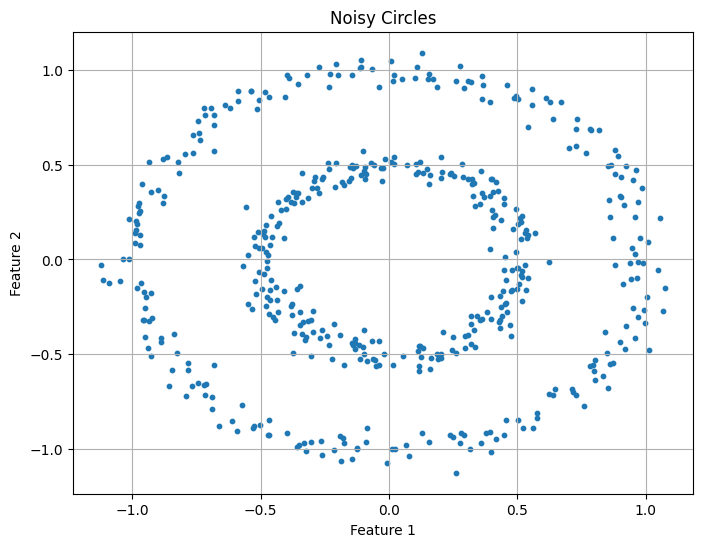

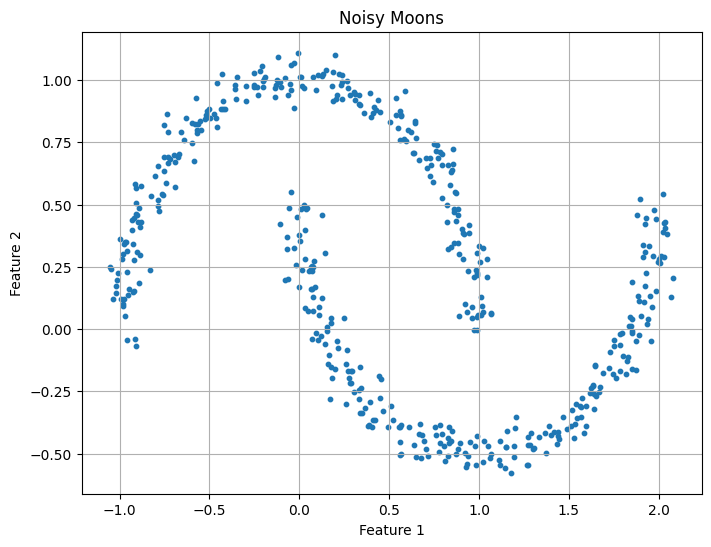

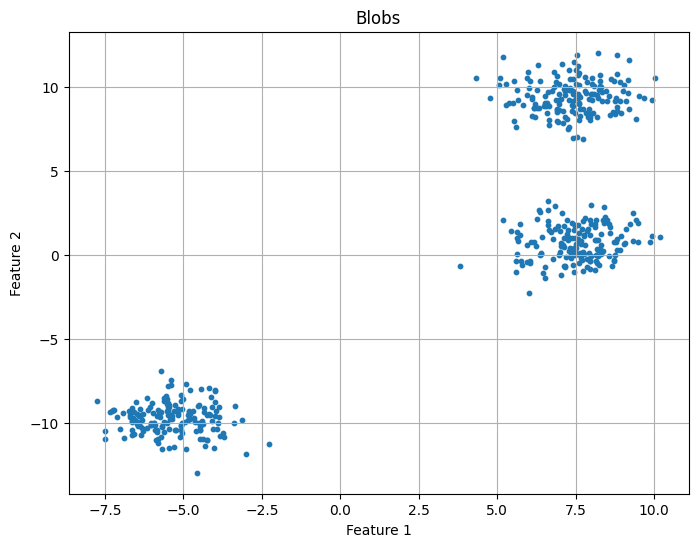

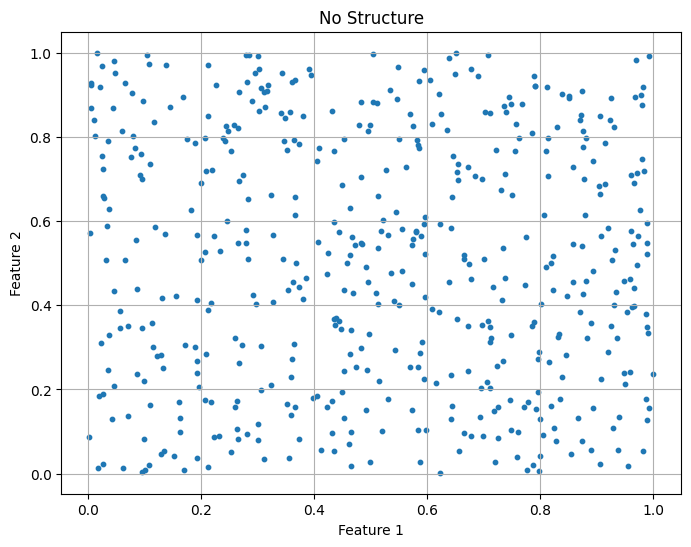

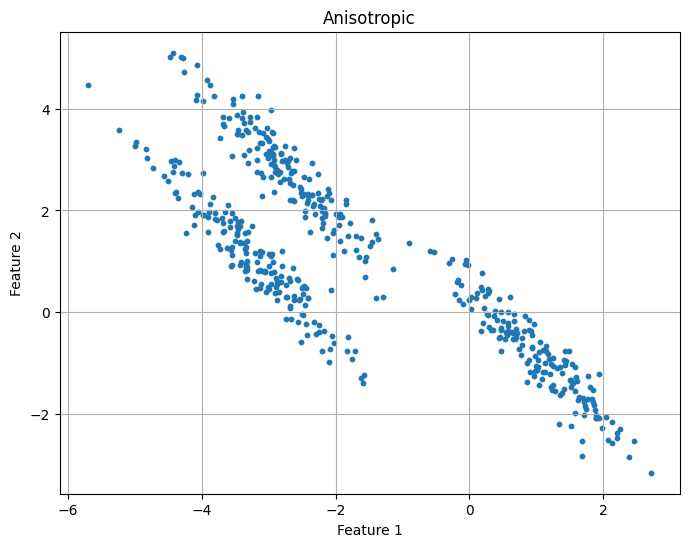

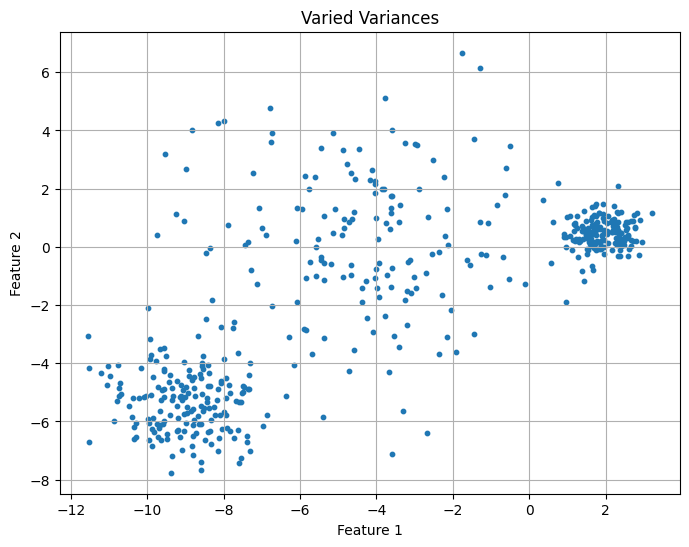

In [5]:
# Define a function to plot the datasets
def plot_dataset(X, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], s=10)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.show()

# Plot each dataset
datasets = [
    ("Noisy Circles", noisy_circles[0]),
    ("Noisy Moons", noisy_moons[0]),
    ("Blobs", blobs[0]),
    ("No Structure", no_structure[0]),
    ("Anisotropic", aniso[0]),
    ("Varied Variances", varied[0])
]

for name, data in datasets:
    plot_dataset(data, name)


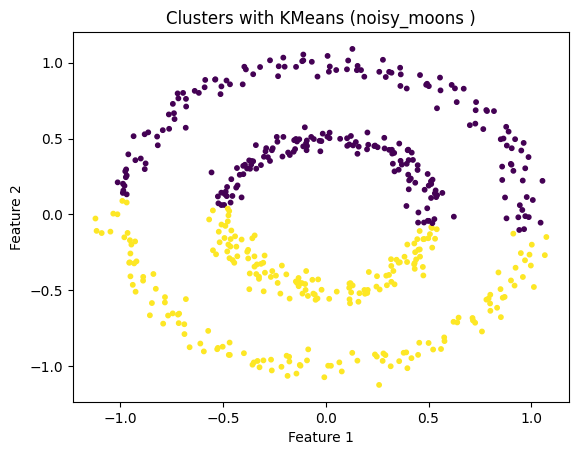

In [24]:
# Utiliza el conjunto de datos Noisy Circles que has creado previamente
X_noisy_circles = noisy_circles[0]

# Crea una instancia de tu clase KMeans
kmeans_noisy_circles = KMeans(n_clusters=2)

# Ajusta el modelo a los datos
kmeans_noisy_circles.fit(X_noisy_circles)

# Obtiene las etiquetas de los clusters
labels_noisy_circles = kmeans_noisy_circles.labels

# Visualiza los resultados (puedes utilizar matplotlib)
import matplotlib.pyplot as plt

plt.scatter(X_noisy_circles[:, 0], X_noisy_circles[:, 1], c=labels_noisy_circles, cmap='viridis', s=10)
plt.title('Clusters with KMeans (noisy_moons )')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

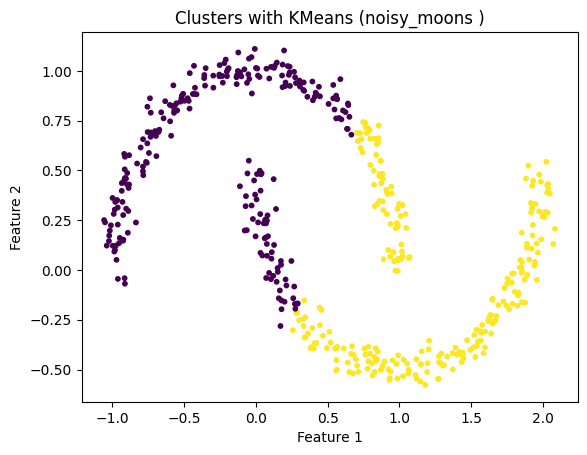

In [21]:
# Utiliza el conjunto de datos Noisy Circles que has creado previamente
X_noisy_moons = noisy_moons[0]

# Crea una instancia de tu clase KMeans
kmeans_noisy_moons  = KMeans(n_clusters=2)

# Ajusta el modelo a los datos
kmeans_noisy_moons.fit(X_noisy_moons)

# Obtiene las etiquetas de los clusters
labels_noisy_moons = kmeans_noisy_moons.labels

# Visualiza los resultados (puedes utilizar matplotlib)
import matplotlib.pyplot as plt

plt.scatter(X_noisy_moons[:, 0], X_noisy_moons[:, 1], c=labels_noisy_moons, cmap='viridis', s=10)
plt.title('Clusters with KMeans (noisy_moons )')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

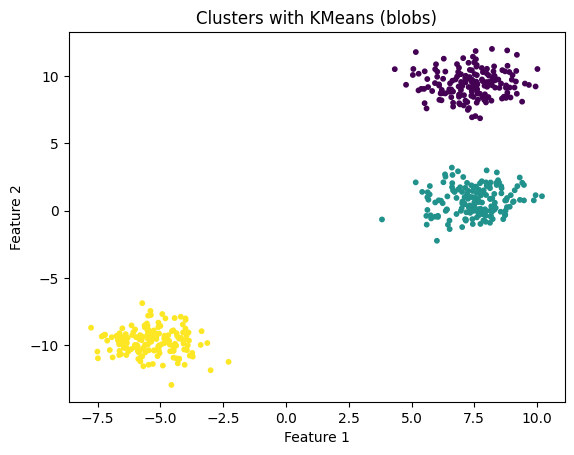

In [23]:
# Utiliza el conjunto de datos Noisy Circles que has creado previamente
X_Blobs = blobs[0]

# Crea una instancia de tu clase KMeans
kmeans_Blobs  = KMeans(n_clusters=3)

# Ajusta el modelo a los datos
kmeans_Blobs.fit(X_Blobs)

# Obtiene las etiquetas de los clusters
labels_Blobs = kmeans_Blobs.labels

# Visualiza los resultados (puedes utilizar matplotlib)
import matplotlib.pyplot as plt

plt.scatter(X_Blobs[:, 0], X_Blobs[:, 1], c=labels_Blobs, cmap='viridis', s=10)
plt.title('Clusters with KMeans (blobs)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()